# EDA S&P500

#La tendencia del índice en el tiempo.

#La volatilidad del índice en diferentes periodos de tiempo.

#La distribución de los rendimientos del índice.

#Los valores atípicos (outliers) en los rendimientos del índice.

#La relación del índice con otras variables económicas o financieras.

#Algunas técnicas comunes en el EDA con los datos del S&P 500 son:

#Visualización de la serie temporal del índice y su evolución en el tiempo.

#Análisis de la distribución de los rendimientos del índice, utilizando histogramas o gráficos de densidad.

#Identificación de valores atípicos (outliers) en los rendimientos del índice, utilizando boxplots o diagramas de caja y bigotes.

#Análisis de la correlación del índice con otras variables económicas o financieras, utilizando gráficos de dispersión o matrices de correlación.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests

## Índice S&P500

### Importación y transformación de datos

In [13]:
SP500 = yf.Ticker("^GSPC")


In [14]:
print(SP500.fast_info)

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']


In [58]:
SP500.history(period="23y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-02-24 00:00:00-05:00,1360.689941,1364.800049,1329.880005,1353.430054,1215000000,0.0,0.0
2000-02-25 00:00:00-05:00,1353.430054,1362.140015,1329.150024,1333.359985,1065200000,0.0,0.0
2000-02-28 00:00:00-05:00,1333.359985,1360.819946,1325.069946,1348.050049,1026500000,0.0,0.0
2000-02-29 00:00:00-05:00,1348.050049,1369.630005,1348.050049,1366.420044,1204300000,0.0,0.0
2000-03-01 00:00:00-05:00,1366.420044,1383.459961,1366.420044,1379.189941,1274100000,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-16 00:00:00-05:00,4114.750000,4136.540039,4089.489990,4090.409912,4143660000,0.0,0.0
2023-02-17 00:00:00-05:00,4077.389893,4081.510010,4047.949951,4079.090088,4045480000,0.0,0.0
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,0.0,0.0


In [57]:
df_sp500 = SP500.history(period="23y")

In [19]:
df_sp500.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5787.000000,5787.000000,5787.000000,5787.000000,5.787000e+03,5787.0,5787.0
mean,1889.780884,1901.072838,1877.567001,1890.016661,3.316753e+09,0.0,0.0
std,979.404140,984.552616,973.783801,979.523393,1.517092e+09,0.0,0.0
min,679.280029,695.270020,666.789978,676.530029,3.560700e+08,0.0,0.0
25%,1183.795044,1190.855042,1175.725037,1183.630005,2.040965e+09,0.0,0.0
50%,1436.229980,1445.599976,1427.959961,1436.510010,3.419620e+09,0.0,0.0
75%,2398.489990,2405.675049,2387.054932,2399.334961,4.164435e+09,0.0,0.0
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0


In [36]:
sp500 = yf.download('^GSPC', start='2000-01-01', end='2023-02-23')

[*********************100%***********************]  1 of 1 completed


In [37]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-15,4119.500000,4148.109863,4103.979980,4147.600098,4147.600098,4075980000
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000


In [38]:
sp500 = sp500.rename(columns={"Open":"Precio Apertura","High":"Precio Máximo","Low":"Precio Mínimo","Close":"Precio Cierre", "Adj Close":"Cierre Ajustado","Volume":"Volumen"})
sp500.index.name = "Fecha"

In [48]:
sp500

,Precio Apertura,Precio Máximo,Precio Mínimo,Precio Cierre,Cierre Ajustado,Volumen
Fecha,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-15,4119.500000,4148.109863,4103.979980,4147.600098,4147.600098,4075980000
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000


In [49]:
sp500.describe()

,Precio Apertura,Precio Máximo,Precio Mínimo,Precio Cierre,Cierre Ajustado,Volumen
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5.822000e+03
mean,1886.489156,1897.781251,1874.257266,1886.705950,1886.705950,3.302644e+09
std,976.763129,981.894853,971.187546,976.894131,976.894131,1.522890e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1184.599976,1191.762512,1177.137482,1184.415009,1184.415009,1.985738e+09
50%,1434.525024,1443.684998,1425.535034,1434.429993,1434.429993,3.408845e+09
75%,2390.735046,2395.654968,2380.305054,2389.332520,2389.332520,4.159688e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [50]:
#Exportamos esta base que utilizaremos para contar la historia.
sp500.to_csv("Data_indice_SP500.csv")

### Análisis S&P500

Visualizaremos el comportamiento del precio de cierre ajustado a través del tiempo desde el 2000 al 2023

In [25]:
sp500=pd.read_csv("Data_indice_SP500.csv", parse_dates=['Fecha'], index_col='Fecha')

In [26]:
sp500

,Precio Apertura,Precio Máximo,Precio Mínimo,Precio Cierre,Cierre Ajustado,Volumen
Fecha,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-15,4119.500000,4148.109863,4103.979980,4147.600098,4147.600098,4075980000
2023-02-16,4114.750000,4136.540039,4089.489990,4090.409912,4090.409912,4143660000
2023-02-17,4077.389893,4081.510010,4047.949951,4079.090088,4079.090088,4045480000


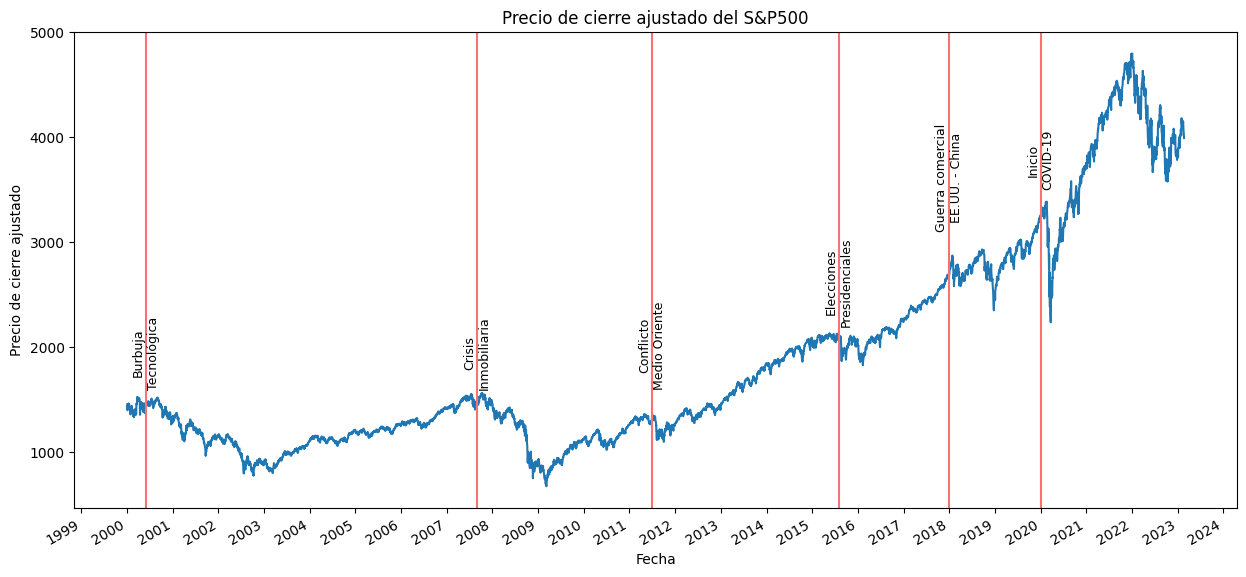

In [28]:
# Graficar los precios de cierre ajustado del S&P500
fig, ax = plt.subplots(figsize=(15, 7))
sp500['Precio Cierre'].plot(ax=ax)

# Configurar formato de las etiquetas del eje x para mostrar todos los años
years = mdates.YearLocator()   # localizar años
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Líneas verticales y comentarios para señalar los cambios en la tendencia.
plt.text('2000-06-01', 1600, 'Burbuja\nTecnológica', rotation=90, ha="center", va="bottom", fontsize=9)
plt.axvline(x='2000-06-01', color='#F97171') 

plt.text('2007-09-01', 1600, 'Crisis\nInmobiliaria', rotation=90, ha="center", va="bottom", fontsize=9)
plt.axvline(x='2007-09-01', color='#F97171') 

plt.text('2011-07-01', 1600, 'Conflicto\nMedio Oriente', rotation=90, ha="center", va="bottom", fontsize=9)
plt.axvline(x='2011-07-01', color='#F97171') 

plt.text('2015-08-01', 2200, 'Elecciones\nPresidenciales', rotation=90, ha="center", va="bottom", fontsize=9)
plt.axvline(x='2015-08-01', color='#F97171')

plt.text('2018-01-01', 3100, 'Guerra comercial\nEE.UU. - China', rotation=90, ha="center", va="bottom", fontsize=9)
plt.axvline(x='2018-01-01', color='#F97171')

plt.text('2020-01-01', 3500, 'Inicio\nCOVID-19', rotation=90, ha="center", va="bottom", fontsize=9)
plt.axvline(x='2020-01-01', color='#F97171')

# Etiquetas y títulos del gráfico
plt.title("Precio de cierre ajustado del S&P500")
plt.ylabel("Precio de cierre ajustado")
plt.xlabel("Fecha")

# Mostrar el gráfico
plt.show()

Observaciones:
* En el año 2000 se observa un decrecimiento, el cual se debe a la burbuja tecnológica, ya que se tenía fe en que este sector creciera mucho por la incorporación del internet y las nuevas computadores, sin embargo no se tuvo el crecimiento a la velocidad esperada así que hubo una bajada importante. Es hasta el 2003 que se inicia la recuperación.
* En el año 2008 inició la crisis mobiliaria, generada por la venta excesiva de créditos hipotecarios que cayeron en mora al no tener la capacidad de pagarse, la caída de este sector afectó a todo el índice, observándose la mayor a mediados de 2008 cuando la empresa Lehman Brothers se declaró en banca rota. Se empieza a recuperar a principios de 2009 con el rescate financiero implementado por el gobierno de Barak Obama.
* Entre los años 2011 y 2012 eventos como la crisis de la deuda en Grecia, y las tensiones políticas en medio oriente que generaron un incremento en los precios del petroleo, generaron la volatilidad que se observa en dicho periodo.
* Entre los años 2015 y 2016 hubo una desaceleración global, cayeron los precios del petróleo y existía incertidumbre política por las elecciones presidenciales, lo que generó volatilidad en el mercado. En este mismo contexto a finales de 2018 principios de 2019, previo a la pandemia COVID-19 se observa volatilidad debido a la Guerra comercial entre China y EEUU por las políticas de Donald Trump. Ya más avanzado 2019 se empíeza a recuperar por las medidas de la FED que redujo las tasas de interés para generar inversión.
* A principios de 2020 entra la crisis por la pandemia COVID-19, se observa un movimiento fuerte a la baja, pero no muy posterior a ello las medidas nuevamente de la FED para generar inversión y recuperar la economía hacen que vuelva a incrementar la inversión, además del desarrollo de los sectores tecnológicos y de bienes de consumo que se incrementaron a nivel mundial ya que la modalidad en línea fue la alternativa.
* Por último se observa volatilidad importante en 2022 por el conflicto entre Rusia y Ucrania, el cuál también afectó a EE.UU.

Calcular la tasa de rendimiento diaria del índice S&P500 utilizando la función "pct_change" de pandas y visualizar su distribución utilizando un histograma.

Analizamos con un bopxplot los outliers

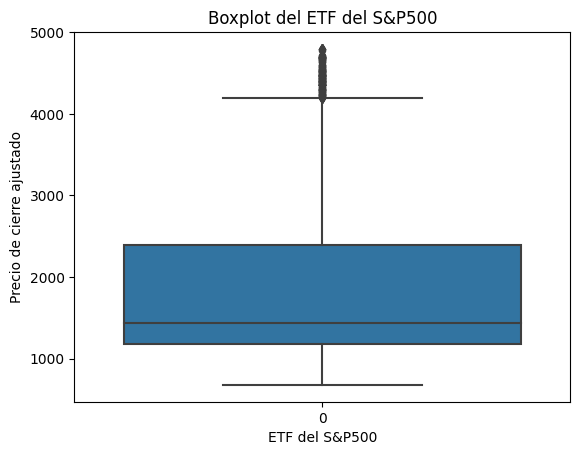

In [36]:
sns.boxplot(data=sp500['Cierre Ajustado'])

# Establecer el título y los ejes
plt.title('Boxplot del ETF del S&P500')
plt.xlabel('ETF del S&P500')
plt.ylabel('Precio de cierre ajustado')

# Mostrar el boxplot
plt.show()

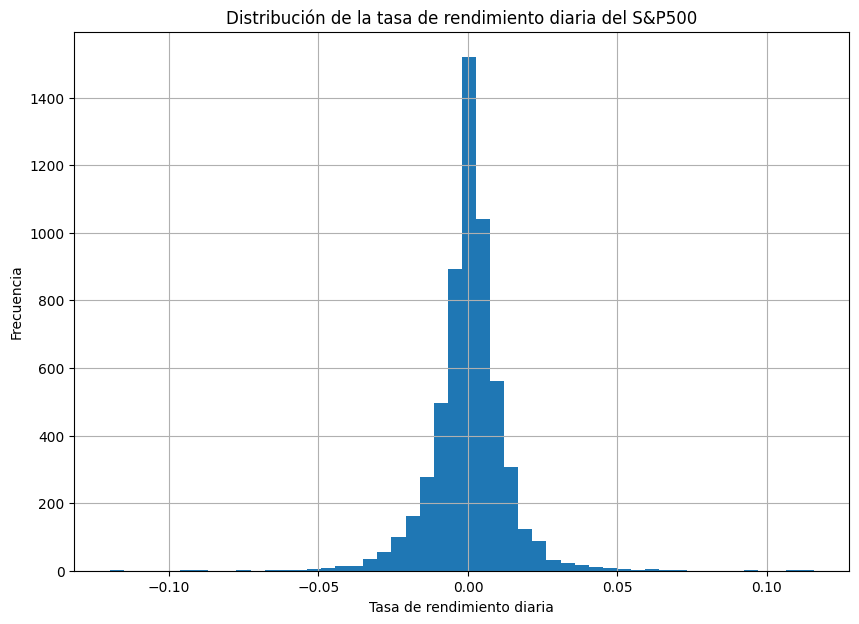

In [30]:
returns = sp500['Cierre Ajustado'].pct_change()
returns.hist(bins=50, figsize=(10, 7))
plt.title("Distribución de la tasa de rendimiento diaria del S&P500")
plt.xlabel("Tasa de rendimiento diaria")
plt.ylabel("Frecuencia")
plt.show()

Calcular la volatilidad diaria del índice S&P500 utilizando la función "std" de pandas y visualizar su distribución utilizando un histograma.

Volatilidad diaria del S&P500:  0.012495981195171216


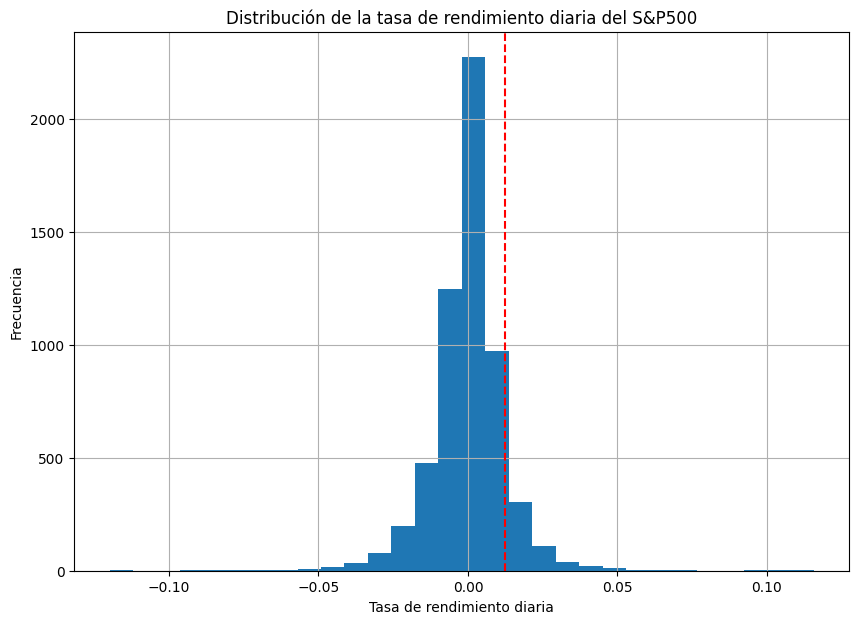

In [40]:
volatility = returns.std()
print("Volatilidad diaria del S&P500: ", volatility)

returns.hist(bins=30, figsize=(10, 7))
plt.title("Distribución de la tasa de rendimiento diaria del S&P500")
plt.xlabel("Tasa de rendimiento diaria")
plt.ylabel("Frecuencia")
plt.axvline(volatility, color='red', linestyle='--')
plt.show()

Calcular el rendimiento acumulado del índice S&P500 utilizando la función "cumprod" de pandas y visualizar su serie de tiempo utilizando la función "plot".

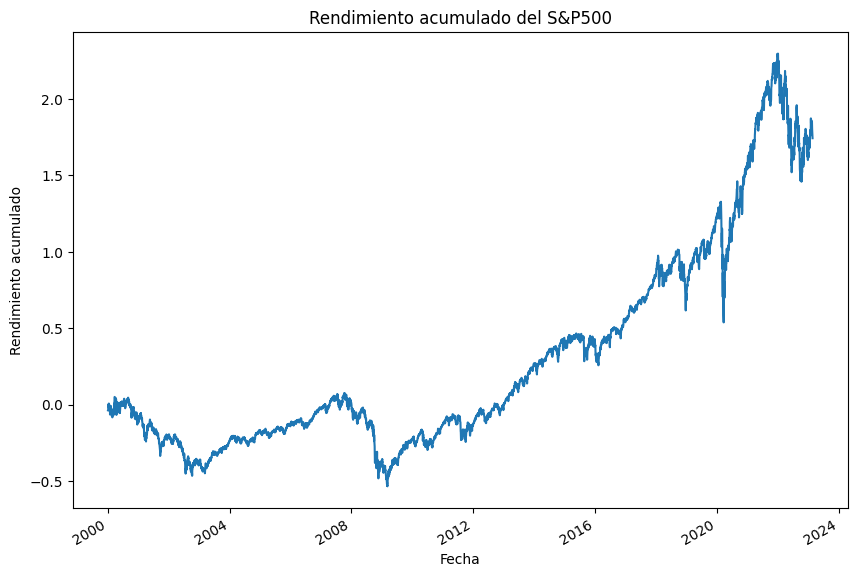

In [32]:
cumulative_returns = (1 + returns).cumprod() - 1
cumulative_returns.plot(figsize=(10, 7))
plt.title("Rendimiento acumulado del S&P500")
plt.ylabel("Rendimiento acumulado")
plt.show()

Calcular la media móvil simple y la media móvil exponencial del precio de cierre ajustado del índice S&P500 utilizando las funciones "rolling" y "ewm" de pandas y visualizarlas junto con el precio de cierre ajustado utilizando la función "plot".

Esto nos dará una idea de cómo se comparan la media móvil simple (SMA) y la media móvil exponencial (EMA) con el precio de cierre ajustado del índice S&P500

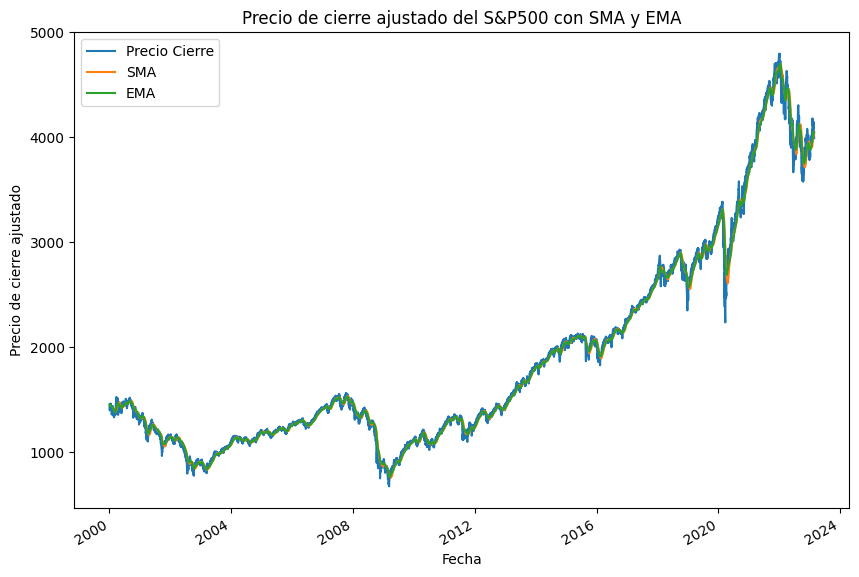

In [42]:
sp500['SMA'] = sp500['Precio Cierre'].rolling(window=30).mean()
sp500['EMA'] = sp500['Precio Cierre'].ewm(span=30, adjust=False).mean()

sp500[['Precio Cierre', 'SMA', 'EMA']].plot(figsize=(10, 7))
plt.title("Precio de cierre ajustado del S&P500 con SMA y EMA")
plt.ylabel("Precio de cierre ajustado")
plt.show()

## MarketCap por empresa

In [26]:
#Tomamos el contenido de la página de wikipedia sobre las empresas que componen el SP500 y transformamos a dataframe.
pagina = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_empresas = pd.read_html(pagina.content)[0]
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [27]:
#Vemos que empresas tienen mal sus códigos (hallado a posteriori en celda 5)
aux = []
for i in sp500_empresas['Symbol'].values:
    if i.find('.')!=-1:
        aux.append(i)
aux

['BRK.B', 'BF.B']

In [28]:
#Reemplazamos por el código correcto
sp500_empresas['Symbol'].replace('BRK.B','BRK-B',inplace=True)
sp500_empresas['Symbol'].replace('BF.B','BF-B',inplace=True)

In [29]:
#Obtenemos el valor del market cap de cada empresa. Utilizamos para ello Yahoo Finance.
lista = []

for symbol in sp500_empresas.Symbol.values:
    lista.append(yf.Ticker(symbol).fast_info['marketCap'])

In [33]:
#Agregamos esta columna l dataframe y comprobamos con lo que está en la web
sp500_empresas['Market Capitalization']=lista
sp500_empresas.head()

,Simbolo,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,5.934390e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.792048e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.745945e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.702051e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.679800e+11


In [34]:
sp500_empresas = sp500_empresas.rename(columns= {"Symbol":"Simbolo","Security":"Nombre","GICS Sector":"Sector","GICS Sub-Industry":"Subsector","Headquarters Location":"Ubicación","Date added":"Fecha Incorporación","CIK":"Clave Indice Central","Founded":"Fundación","Market Capitalization":"Capitalización Bursátil"})
sp500_empresas

,Simbolo,Nombre,Sector,Subsector,Ubicación,Fecha Incorporación,Clave Indice Central,Fundación,Capitalización Bursátil
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,5.934390e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.792048e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.745945e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.702051e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.679800e+11
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,3.551240e+10
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,1.500606e+10
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,2.577485e+10
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873,7.472585e+09


In [35]:
# Por lo tardado del proceso, guardamos este DF en un archivo CSV para importarlo al gusto.
sp500_empresas.to_csv("Empresas_S&P500.csv", index=False)

## Análisis sectores

### Importación de tablas

In [43]:
empresas = pd.read_csv("Empresas_S&P500.csv")

In [44]:
empresas.head()

,Simbolo,Nombre,Sector,Subsector,Ubicación,Fecha Incorporación,Clave Indice Central,Fundación,Capitalización Bursátil
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,5.934390e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.792048e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.745945e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.702051e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.679800e+11


In [46]:
empresas["Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [100]:
#Extraemos el nombre de los 11 sectores que conforman el S&P500
sectores = list(set(empresas["Sector"]))

In [101]:
#Extraemos el nombre de los subsectores que conforman el S&P500
subsectores = list(set(empresas["Subsector"]))

In [50]:
sectores

['Industrials',
 'Materials',
 'Health Care',
 'Communication Services',
 'Information Technology',
 'Consumer Staples',
 'Energy',
 'Consumer Discretionary',
 'Financials',
 'Utilities',
 'Real Estate']

In [99]:
etf_sectores = ["XLC", "XLU", "XLE", "XLRE", "XLP", "XLI", "XLB","XLF", "XLK","XLY","XLV"]

### ETF's por sector

Para este proceso queremos el precio de cierre ("Adj Close") de los ETF's de cada sector para hacer una comparación el del SP500

In [110]:
print(sectores)
print(etf_sectores)

['Communication Services', 'Utilities', 'Energy', 'Real Estate', 'Consumer Staples', 'Industrials', 'Materials', 'Financials', 'Information Technology', 'Consumer Discretionary', 'Health Care']
['XLC', 'XLU', 'XLE', 'XLRE', 'XLP', 'XLI', 'XLB', 'XLF', 'XLK', 'XLY', 'XLV']


In [65]:
df_sp500 = yf.download("^GSPC", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_sp500.name = "S&P500"
df_sp500

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2023-02-16    4090.409912
2023-02-17    4079.090088
2023-02-21    3997.340088
2023-02-22    3991.050049
2023-02-23    4012.320068
Name: S&P500, Length: 5823, dtype: float64

In [66]:
df_comunicacion = yf.download("XLC", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_comunicacion.name = "Comunicaciones"
df_comunicacion

[*********************100%***********************]  1 of 1 completed


Date
2018-06-19    48.000614
2018-06-20    48.596302
2018-06-21    48.298454
2018-06-22    48.509827
2018-06-25    47.510612
                ...    
2023-02-16    55.410000
2023-02-17    55.349998
2023-02-21    54.130001
2023-02-22    54.240002
2023-02-23    53.990002
Name: Comunicaciones, Length: 1179, dtype: float64

In [67]:
df_serv_pub =yf.download("XLU", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_serv_pub.name = "Servicios Públicos"
df_serv_pub

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    12.175936
2000-01-04    11.808653
2000-01-05    12.106641
2000-01-06    12.085849
2000-01-07    12.189801
                ...    
2023-02-16    67.750000
2023-02-17    68.480003
2023-02-21    67.199997
2023-02-22    66.940002
2023-02-23    66.589996
Name: Servicios Públicos, Length: 5823, dtype: float64

In [68]:
df_energia= yf.download("XLE", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_energia.name = "Energético"
df_energia

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    14.830892
2000-01-04    14.551714
2000-01-05    14.935570
2000-01-06    15.511361
2000-01-07    15.677106
                ...    
2023-02-16    87.610001
2023-02-17    84.489998
2023-02-21    84.070000
2023-02-22    83.510002
2023-02-23    84.769997
Name: Energético, Length: 5823, dtype: float64

In [69]:
df_inmobil= yf.download("XLRE", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_inmobil.name ="Inmobiliario"
df_inmobil

[*********************100%***********************]  1 of 1 completed


Date
2015-10-08    23.498526
2015-10-09    23.459639
2015-10-12    23.607428
2015-10-13    23.459639
2015-10-14    23.459639
                ...    
2023-02-16    39.810001
2023-02-17    39.610001
2023-02-21    38.830002
2023-02-22    38.480000
2023-02-23    38.849998
Name: Inmobiliario, Length: 1857, dtype: float64

In [70]:
df_cons_pere= yf.download("XLP", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_cons_pere.name = "Bienes Consumo Perecederos"
df_cons_pere

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    13.234908
2000-01-04    12.862227
2000-01-05    13.089473
2000-01-06    13.334901
2000-01-07    14.180255
                ...    
2023-02-16    72.739998
2023-02-17    73.680000
2023-02-21    73.400002
2023-02-22    73.290001
2023-02-23    73.199997
Name: Bienes Consumo Perecederos, Length: 5823, dtype: float64

In [71]:
df_indus = yf.download("XLI", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_indus.name = "Industrial"
df_indus

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     18.979504
2000-01-04     18.455156
2000-01-05     18.372906
2000-01-06     18.619656
2000-01-07     19.329082
                 ...    
2023-02-16    102.360001
2023-02-17    103.029999
2023-02-21    100.669998
2023-02-22    100.419998
2023-02-23    100.889999
Name: Industrial, Length: 5823, dtype: float64

In [72]:
df_material = yf.download("XLB", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_material.name="Material"
df_material

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    15.398961
2000-01-04    15.250720
2000-01-05    15.880761
2000-01-06    16.288433
2000-01-07    16.279165
                ...    
2023-02-16    82.070000
2023-02-17    81.300003
2023-02-21    79.959999
2023-02-22    80.559998
2023-02-23    80.650002
Name: Material, Length: 5823, dtype: float64

In [73]:
df_finanzas = yf.download("XLF", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_finanzas.name = "Financiero"
df_finanzas

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    11.698804
2000-01-04    11.187384
2000-01-05    11.099480
2000-01-06    11.586932
2000-01-07    11.778717
                ...    
2023-02-16    36.380001
2023-02-17    36.389999
2023-02-21    35.639999
2023-02-22    35.599998
2023-02-23    35.630001
Name: Financiero, Length: 5823, dtype: float64

In [74]:
df_ti =yf.download("XLK", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_ti.name= "Tecnológico"
df_ti

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     42.209316
2000-01-04     40.067905
2000-01-05     39.473072
2000-01-06     38.164452
2000-01-07     38.830650
                 ...    
2023-02-16    141.589996
2023-02-17    139.820007
2023-02-21    136.500000
2023-02-22    136.300003
2023-02-23    138.559998
Name: Tecnológico, Length: 5823, dtype: float64

In [75]:
df_cons_dura = yf.download("XLY", start='2000-01-01', end='2023-02-24')["Adj Close"]
df_cons_dura.name = "Bienes Consumo Duradero"
df_cons_dura

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     22.924383
2000-01-04     22.234741
2000-01-05     21.961269
2000-01-06     22.210962
2000-01-07     23.257305
                 ...    
2023-02-16    150.539993
2023-02-17    150.570007
2023-02-21    145.539993
2023-02-22    146.279999
2023-02-23    146.160004
Name: Bienes Consumo Duradero, Length: 5823, dtype: float64

In [76]:
df_salud = yf.download("XLV", start='2000-01-01', end='2023-02-24')["Adj Close"] 
df_salud.name = "Salud"
df_salud

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     21.571772
2000-01-04     21.082264
2000-01-05     20.893141
2000-01-06     20.959888
2000-01-07     21.215767
                 ...    
2023-02-16    130.820007
2023-02-17    131.990005
2023-02-21    130.279999
2023-02-22    129.839996
2023-02-23    130.190002
Name: Salud, Length: 5823, dtype: float64

OBSERVACIÓN: Se puede notar que los ETF's no todos cuentan con el histórico requerido, en específico, el sector de comunicaciones que empezó en 2018 y el de Inmobiliario en 2015

Ya que tenemos los dataset, hay que unirlos para que se puedan comparar, tomando como base el del SP500

In [84]:
data_sector = pd.concat([df_sp500,df_comunicacion,df_serv_pub,df_energia,df_inmobil,df_cons_pere,df_cons_dura,df_indus,df_material,df_finanzas,df_ti,df_salud], axis=1)

In [86]:
data_sector.index.name="Fecha"

In [93]:
data_sector

,S&P500,Comunicaciones,Servicios Públicos,Energético,Inmobiliario,Bienes Consumo Perecederos,Bienes Consumo Duradero,Industrial,Material,Financiero,Tecnológico,Salud
Fecha,,,,,,,,,,,,
2000-01-03,1455.219971,NaN,12.175936,14.830892,NaN,13.234908,22.924383,18.979504,15.398961,11.698804,42.209316,21.571772
2000-01-04,1399.420044,NaN,11.808653,14.551714,NaN,12.862227,22.234741,18.455156,15.250720,11.187384,40.067905,21.082264
2000-01-05,1402.109985,NaN,12.106641,14.935570,NaN,13.089473,21.961269,18.372906,15.880761,11.099480,39.473072,20.893141
2000-01-06,1403.449951,NaN,12.085849,15.511361,NaN,13.334901,22.210962,18.619656,16.288433,11.586932,38.164452,20.959888
2000-01-07,1441.469971,NaN,12.189801,15.677106,NaN,14.180255,23.257305,19.329082,16.279165,11.778717,38.830650,21.215767
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16,4090.409912,55.410000,67.750000,87.610001,39.810001,72.739998,150.539993,102.360001,82.070000,36.380001,141.589996,130.820007
2023-02-17,4079.090088,55.349998,68.480003,84.489998,39.610001,73.680000,150.570007,103.029999,81.300003,36.389999,139.820007,131.990005
2023-02-21,3997.340088,54.130001,67.199997,84.070000,38.830002,73.400002,145.539993,100.669998,79.959999,35.639999,136.500000,130.279999


In [88]:
#Exportamos a csv
data_sector.to_csv("Data_por_sector.csv")

### Análisis de ETF's de sector

#### Datos

Analizamos algunos datos de los sectores

In [94]:
data_sector = pd.read_csv("Data_por_sector.csv", parse_dates=['Fecha'], index_col='Fecha')

In [95]:
#Para la graficación, eliminamos los datos de S&P500 para observar mejor el comportamiento
data_sin_SP500 = data_sector.drop("S&P500", axis = 1)

In [96]:
data_sin_SP500 = data_sin_SP500.rename(columns={"Date":"Fecha"})

In [97]:
data_sin_SP500

,Comunicaciones,Servicios Públicos,Energético,Inmobiliario,Bienes Consumo Perecederos,Bienes Consumo Duradero,Industrial,Material,Financiero,Tecnológico,Salud
Fecha,,,,,,,,,,,
2000-01-03,NaN,12.175936,14.830892,NaN,13.234908,22.924383,18.979504,15.398961,11.698804,42.209316,21.571772
2000-01-04,NaN,11.808653,14.551714,NaN,12.862227,22.234741,18.455156,15.250720,11.187384,40.067905,21.082264
2000-01-05,NaN,12.106641,14.935570,NaN,13.089473,21.961269,18.372906,15.880761,11.099480,39.473072,20.893141
2000-01-06,NaN,12.085849,15.511361,NaN,13.334901,22.210962,18.619656,16.288433,11.586932,38.164452,20.959888
2000-01-07,NaN,12.189801,15.677106,NaN,14.180255,23.257305,19.329082,16.279165,11.778717,38.830650,21.215767
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16,55.410000,67.750000,87.610001,39.810001,72.739998,150.539993,102.360001,82.070000,36.380001,141.589996,130.820007
2023-02-17,55.349998,68.480003,84.489998,39.610001,73.680000,150.570007,103.029999,81.300003,36.389999,139.820007,131.990005
2023-02-21,54.130001,67.199997,84.070000,38.830002,73.400002,145.539993,100.669998,79.959999,35.639999,136.500000,130.279999


Utilizamos el método describe() para analizar los valores generales del precio de cierre ajustado de cada sector

In [98]:
data_sin_SP500.describe()

,Comunicaciones,Servicios Públicos,Energético,Inmobiliario,Bienes Consumo Perecederos,Bienes Consumo Duradero,Industrial,Material,Financiero,Tecnológico,Salud
count,1179.000000,5823.000000,5823.000000,1857.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000
mean,57.690526,30.212472,41.029806,32.454978,31.429656,59.496351,40.882118,34.831289,17.746809,42.907090,49.074226
std,12.219394,17.478889,17.312119,6.923584,18.767971,47.361990,25.540240,19.656290,7.516091,38.961030,34.604933
min,37.665211,7.444191,11.532519,21.406898,10.819390,13.341512,11.586655,10.333910,3.882159,8.816842,15.605210
25%,47.800577,16.560419,27.889212,26.673105,15.214929,24.595998,20.711209,18.910197,12.543770,17.313431,22.394731
50%,54.076595,23.875183,44.690792,31.466572,22.665167,33.495289,28.924042,29.500273,16.049408,25.202721,27.839024
75%,66.810459,42.599039,52.535311,36.607258,46.083614,84.027164,58.869287,46.447935,21.727878,51.308329,68.608765
max,84.913857,76.964714,93.120911,50.074089,78.886963,209.280777,105.220367,88.846230,40.570641,174.931732,141.083725


#### Gráficos Históricos

In [55]:
# cambiamos el formato del campo "Fecha" con "Date time" para que en la gráfica los reconozca con "YearLocator"
data_sin_SP500["Fecha"]=pd.to_datetime(data_sin_SP500["Fecha"])

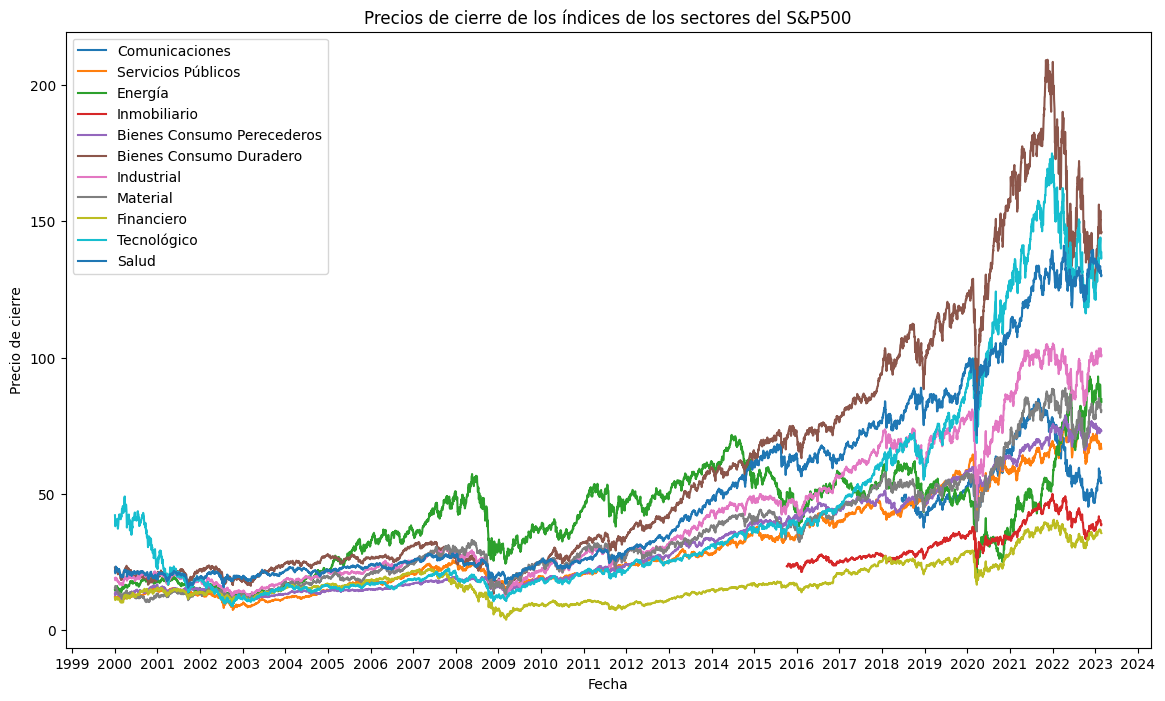

In [56]:
fig, ax = plt.subplots(figsize=(14, 8))

# Iterar sobre las columnas del dataframe que contienen los precios de cierre de los índices de los sectores
for col in data_sin_SP500.columns[1:]:
    # Graficar la columna de precios de cierre en la subparcela con el eje x correspondiente a la columna Date
    ax.plot(data_sin_SP500['Fecha'], data_sin_SP500[col], label=col)

# Configurar formato de las etiquetas del eje x para mostrar todos los años
years = mdates.YearLocator()   # localizar años
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Agregar título, etiquetas de eje y leyenda
ax.set_title('Precios de cierre de los índices de los sectores del S&P500')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio de cierre')
ax.legend()

# Mostrar el gráfico
plt.show()

Aunque no se puede observar muy bien el detalle, sí nos da una luz sobre algunos sectores interesantes, por ejemplo:
* El sector de consumo duradero es el que los últimos años ha tenido un mayor crecimiento y volatilidad, seguido del tecnológico y de la salud.
* El sector energético, aparentemente tiene mayor estabilidad ya que sus movimientos no son tan volátiles.

In [154]:
data_sin_SP500.columns

Index(['Fecha', 'Comunicaciones', 'Servicios Públicos', 'Energía',
       'Inmobiliario', 'Bienes Consumo Perecederos', 'Bienes Consumo Duradero',
       'Industrial', 'Material', 'Financiero', 'Tecnológico', 'Salud'],
      dtype='object')

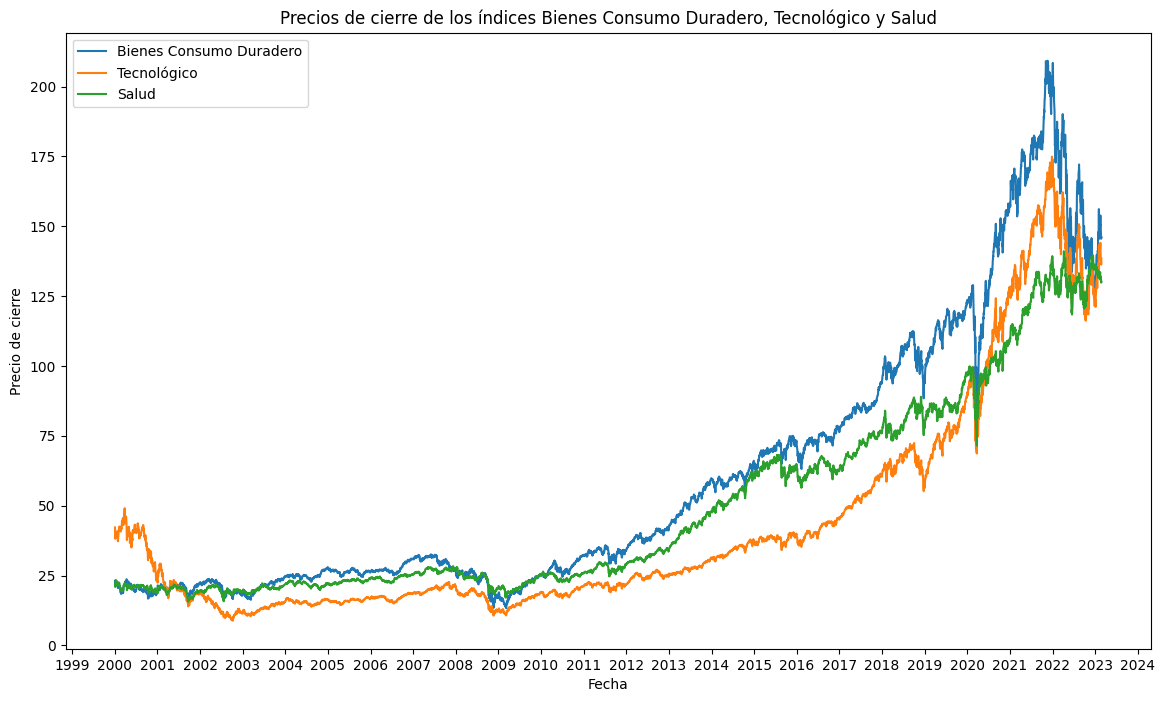

In [158]:
#Identificamos los sectores con mayor volatilidad

fig, ax = plt.subplots(figsize=(14, 8))

columnas = ['Bienes Consumo Duradero','Tecnológico', 'Salud']
# Iterar sobre las columnas del dataframe que contienen los precios de cierre de los índices de los sectores
for col in columnas:
    # Graficar la columna de precios de cierre en la subparcela con el eje x correspondiente a la columna Date
    ax.plot(data_sin_SP500['Fecha'], data_sin_SP500[col], label=col)

# Configurar formato de las etiquetas del eje x para mostrar todos los años
years = mdates.YearLocator()   # localizar años
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Agregar título, etiquetas de eje y leyenda
ax.set_title('Precios de cierre de los índices Bienes Consumo Duradero, Tecnológico y Salud')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio de cierre')
ax.legend()

# Mostrar el gráfico
plt.show()

Se observa que el sector salud es el que tiene menor crecimiento, sin embargo ya para 2022, los Bienes de consumo duradero y el tecnológico disminuyen, pero el de salud se mantiene. Lo que puede significar que tanto la tecnologia como los bienes duraderos que crecieron por la modalidad de estar en casa empezaron a disminuir por la reapertura de actividades presenciales, mientras que el de la salud no está sujeta a esta modalidad.

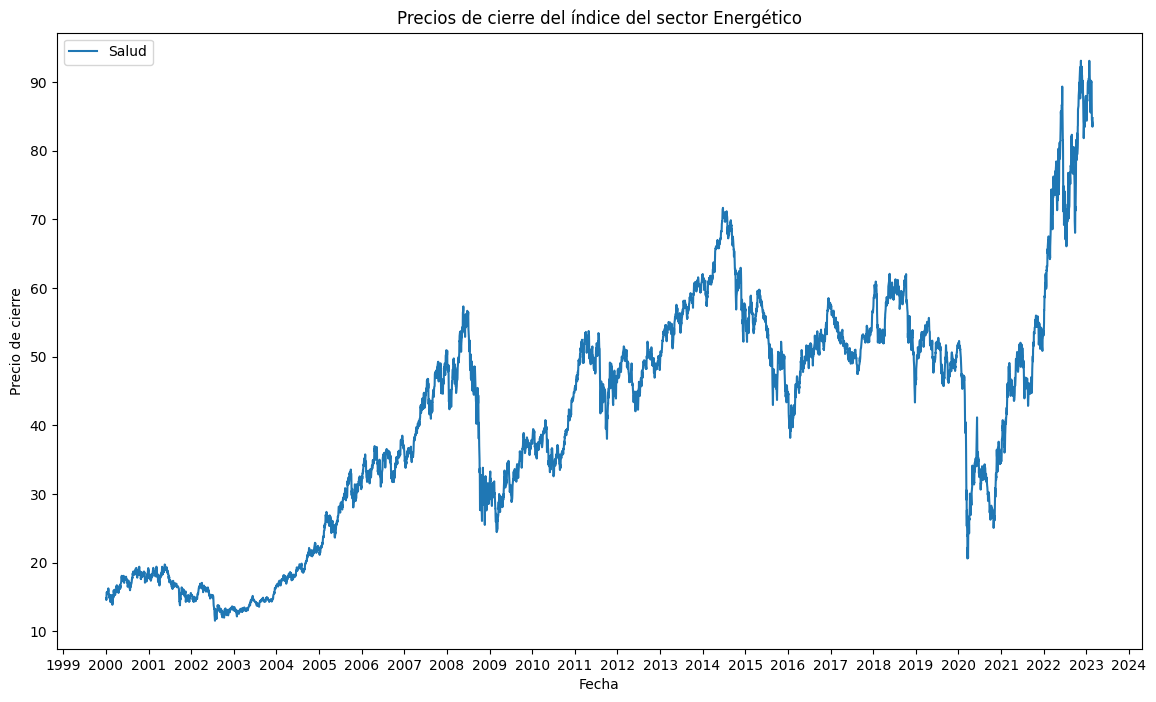

In [157]:
#Revisamos el sector energético

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data_sin_SP500['Fecha'], data_sin_SP500['Energía'], label=col)

# Configurar formato de las etiquetas del eje x para mostrar todos los años
years = mdates.YearLocator()   # localizar años
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Agregar título, etiquetas de eje y leyenda
ax.set_title('Precios de cierre del índice del sector Energético')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio de cierre')
ax.legend()

# Mostrar el gráfico
plt.show()

#### Correlación

In [215]:
corr_sp500_sectors = data_sector.corr()["S&P500"]

In [216]:
corr_sp500_sectors

S&P500                        1.000000
Comunicaciones                0.857592
Servicios Públicos            0.966881
Energía                       0.610022
Inmobiliario                  0.960962
Bienes Consumo Perecederos    0.967211
Bienes Consumo Duradero       0.989852
Industrial                    0.987101
Material                      0.970279
Financiero                    0.914250
Tecnológico                   0.977811
Salud                         0.985576
Name: S&P500, dtype: float64

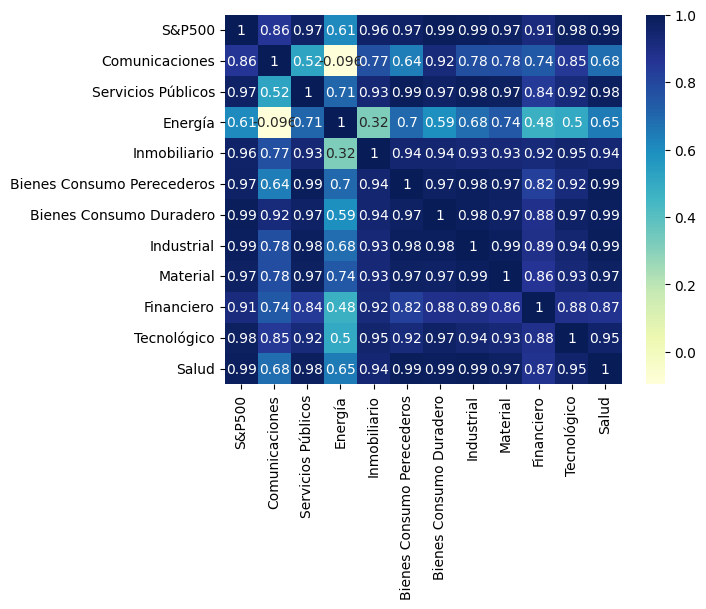

In [219]:
correlation_matrix = data_sector.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

En el gráfico anterior se puede observar dos cosas interesantes:
1. La diferencia de correlación en la mayoría de los ETF's varía muy poco, esto tiene sentido ya que el indice del SP500 lo conforman la toalidad de los ETF's
2. Sobresale el sector energético que no está tan correlacionado con el SP500 es decir puede ser que este se mueva de manera independiente.

Por lo tanto los sectores interesantes que nos pueden ser útiles para analizar son:
* Salud 
* Bienes de consumo duradero
* Tecnológico
* Energía

Los dos primeros muestran la correlación más fuerte del ETF del SP500. El tercero es el sector que creció por la pandemia COVID-19 y el último muestra la menor correlación con el movimiento del ETF del SP500

### Empresas por sector

#### Market Cap

Ahora busquemos la empresa que más influencia tiene en cada ETF para analizarla y proceder a sugerir la compra de acciones.

In [220]:
# Definimos los símbolos de los ETFs de cada sector del S&P500 en un diccionario

etf_symbols = {'Communication Services': 'XLC', 'Consumer Discretionary': 'XLY', 'Consumer Staples': 'XLP', 
               'Energy': 'XLE', 'Financials': 'XLF', 'Health Care': 'XLV', 'Industrials': 'XLI', 
               'Information Technology': 'XLK', 'Materials': 'XLB', 'Real Estate': 'XLRE', 'Utilities': 'XLU'}

In [3]:
df500empresas=pd.read_csv("Empresas_S&P500.csv")

In [4]:
df500empresas

,Simbolo,Nombre,Sector,Subsector,Ubicación,Fecha Incorporación,Clave Indice Central,Fundación,Capitalización Bursátil
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,5.934390e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.792048e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.745945e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.702051e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.679800e+11
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,3.551240e+10
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,1.500606e+10
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,2.577485e+10
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873,7.472585e+09


El Market Cap nos da un panorama muy general porque nos define el tamaño de la empresa, de esta manera si definimos las más grandes y las más pequeñas podemos comparar la salud y la viabilidad de la combra de acciones de una u otra.

In [12]:
# Definimos un dataset con el top "N" de empresas con mayor market cap
max_capitalization = df500empresas.groupby('Sector').apply(lambda x: x.nlargest(1, 'Capitalización Bursátil')).reset_index(drop=True)
max_capitalization

,Simbolo,Nombre,Sector,Subsector,Ubicación,Fecha Incorporación,Clave Indice Central,Fundación,Capitalización Bursátil
0,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services,"Mountain View, California",2006-04-03,1652044,1998,1.142804e+12
1,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724,1994,9.581226e+11
2,WMT,Walmart,Consumer Staples,Hypermarkets & Super Centers,"Bentonville, Arkansas",1982-08-31,104169,1962,3.842131e+11
3,XOM,ExxonMobil,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,34088,1999,4.508610e+11
4,BRK-B,Berkshire Hathaway,Financials,Multi-Sector Holdings,"Omaha, Nebraska",2010-02-16,1067983,1839,6.713765e+11
5,UNH,UnitedHealth Group,Health Care,Managed Health Care,"Minnetonka, Minnesota",1994-07-01,731766,1977,4.525332e+11
6,UPS,United Parcel Service,Industrials,Air Freight & Logistics,"Sandy Springs, Georgia",2002-07-22,1090727,1907,1.547022e+11
7,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,2.321231e+12
8,LIN,Linde plc,Materials,Industrial Gases,"Guildford, United Kingdom",1992-07-01,1707925,1879,1.712438e+11
9,PLD,Prologis,Real Estate,Industrial REITs,"San Francisco, California",2003-07-17,1045609,1983,1.120858e+11


In [13]:
# Definimos un dataset con el top "N" de empresas con menor market cap
min_capitalization = df500empresas.groupby('Sector').apply(lambda x: x.nsmallest(1, 'Capitalización Bursátil')).reset_index(drop=True)
min_capitalization

,Simbolo,Nombre,Sector,Subsector,Ubicación,Fecha Incorporación,Clave Indice Central,Fundación,Capitalización Bursátil
0,LUMN,Lumen Technologies,Communication Services,Alternative Carriers,"Monroe, Louisiana",1999-03-25,18926,1983 (1877),3.683105e+09
1,NWL,Newell Brands,Consumer Discretionary,Housewares & Specialties,"Atlanta, Georgia",1989-04-30,814453,1903,6.017880e+09
2,TAP,Molson Coors Beverage Company,Consumer Staples,Brewers,"Chicago, Illinois",1976-06-30,24545,"2005 (Molson 1786, Coors 1873)",1.166219e+10
3,APA,APA Corporation,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954,1.219558e+10
4,LNC,Lincoln Financial,Financials,Multi-line Insurance,"Radnor, Pennsylvania",1976-06-30,59558,1905,5.391381e+09
5,OGN,Organon & Co.,Health Care,Pharmaceuticals,"Jersey City, New Jersey",2021-06-03,1821825,2021,6.509175e+09
6,ALK,Alaska Air Group,Industrials,Airlines,"SeaTac, Washington",2016-05-13,766421,1985,6.032737e+09
7,DXC,DXC Technology,Information Technology,IT Consulting & Other Services,"Tysons Corner, Virginia",2017-04-04,1688568,2017,6.313622e+09
8,SEE,Sealed Air,Materials,Paper Packaging,"Charlotte, North Carolina",1957-03-04,1012100,1960,7.062776e+09
9,FRT,Federal Realty,Real Estate,Retail REITs,"Rockville, Maryland",2016-02-01,34903,1962,8.776218e+09


#### Información por empresas

In [15]:
# Crear una lista con los tickers de las empresas
tickers = ['UNH', 'OGN', 'AMZN', 'NWL', 'AAPL', 'DXC', 'XOM', 'APA']

# Descargar los datos de yfinance de cada empresa y guardarlos en un DataFrame
hist_empresas = pd.DataFrame()
for ticker in tickers:
    stock = yf.download(ticker, end='2022-02-28')
    stock['ticker'] = ticker
    hist_empresas = pd.concat([hist_empresas, stock])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
hist_empresas = hist_empresas.rename(columns={"Open":"Precio Apertura","High":"Precio Máximo","Low":"Precio Mínimo","Close":"Precio Cierre", "Adj Close":"Cierre Ajustado","Volume":"Volumen","ticker":"Simbolo"})
hist_empresas.index.name = "Fecha"

In [26]:
hist_empresas

,Precio Apertura,Precio Máximo,Precio Mínimo,Precio Cierre,Cierre Ajustado,Volumen,Simbolo
Fecha,,,,,,,
1984-10-17,0.000000,0.148438,0.144531,0.144531,0.117945,9868800,UNH
1984-10-18,0.000000,0.156250,0.148438,0.148438,0.121133,5324800,UNH
1984-10-19,0.000000,0.148438,0.144531,0.144531,0.117945,3043200,UNH
1984-10-22,0.000000,0.148438,0.144531,0.144531,0.117945,2326400,UNH
1984-10-23,0.000000,0.144531,0.140625,0.140625,0.114757,787200,UNH
...,...,...,...,...,...,...,...
2022-02-18,31.809999,32.369999,31.420000,32.160000,31.588324,8774300,APA
2022-02-22,33.020000,33.240002,30.430000,31.040001,30.488234,14908200,APA
2022-02-23,31.440001,32.279999,30.650000,30.830000,30.281965,10600300,APA


In [29]:
hist_empresas.to_csv("datasets/Historial_empresas.csv")

In [34]:
unh=yf.download("UNH", start="2000-01-01", end="2022-02-24")

[*********************100%***********************]  1 of 1 completed


In [35]:
unh

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,6.640625,6.757813,6.617188,6.718750,5.503512,3431200
2000-01-04,6.671875,6.781250,6.617188,6.632813,5.433119,5997600
2000-01-05,6.640625,6.773438,6.578125,6.617188,5.420318,10562400
2000-01-06,6.625000,6.937500,6.609375,6.859375,5.618699,15300000
2000-01-07,7.187500,7.687500,7.109375,7.664063,6.277841,16160800
...,...,...,...,...,...,...
2022-02-16,475.500000,481.730011,471.399994,480.049988,473.979828,2651800
2022-02-17,478.170013,479.290009,468.890015,470.339996,464.392670,2403100
2022-02-18,470.250000,474.920013,466.829987,467.809998,461.894623,2992300


In [36]:
# Crear una lista con los tickers de las empresas
tickers = ['UNH', 'OGN', 'AMZN', 'NWL', 'AAPL', 'DXC', 'XOM', 'APA']

# Descargar los datos de yfinance de cada empresa y guardarlos en un DataFrame
hist_empresas2000 = pd.DataFrame()
for ticker in tickers:
    stock = yf.download(ticker, start='2000-01-01', end='2022-02-24')
    stock['ticker'] = ticker
    hist_empresas2000 = pd.concat([hist_empresas2000, stock])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
hist_empresas2000 = hist_empresas2000.rename(columns={"Open":"Precio Apertura","High":"Precio Máximo","Low":"Precio Mínimo","Close":"Precio Cierre", "Adj Close":"Cierre Ajustado","Volume":"Volumen","ticker":"Simbolo"})
hist_empresas2000.index.name = "Fecha"

In [39]:
hist_empresas2000

,Precio Apertura,Precio Máximo,Precio Mínimo,Precio Cierre,Cierre Ajustado,Volumen,Simbolo
Fecha,,,,,,,
2000-01-03,6.640625,6.757813,6.617188,6.718750,5.503510,3431200,UNH
2000-01-04,6.671875,6.781250,6.617188,6.632813,5.433117,5997600,UNH
2000-01-05,6.640625,6.773438,6.578125,6.617188,5.420319,10562400,UNH
2000-01-06,6.625000,6.937500,6.609375,6.859375,5.618700,15300000,UNH
2000-01-07,7.187500,7.687500,7.109375,7.664063,6.277842,16160800,UNH
...,...,...,...,...,...,...,...
2022-02-16,32.419998,33.230000,31.980000,32.400002,31.824059,7334700,APA
2022-02-17,32.270000,33.240002,32.099998,32.389999,31.814234,6808500,APA
2022-02-18,31.809999,32.369999,31.420000,32.160000,31.588326,8774300,APA


In [40]:
hist_empresas2000.to_csv("datasets/Historial_empresas_2000.csv")